# Torsion elastique

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [2]:
def load(filename: str):
    return pd.read_csv(filename)

In [3]:
laiton = load('../data/laiton_torsion_vs_masse.csv')
acier = load('../data/acier_torsion_vs_masse.csv')
magnesium = load('../data/magnesium_torsion_vs_masse.csv')

In [4]:
def fit_line(data):
    masse_sus = unp.uarray(data["Masse [g]"], delta_masse)
    start = unp.uarray(data["Start [cm]"], delta_regle_laser)
    stop = unp.uarray(data["Stop [cm]"], delta_regle_laser)
    deviation = stop - start

    theta = 0.5 * unp.arctan(deviation / distance_regle)
    P = masse_sus * g * 0.001
    coefs, cov = np.polyfit(nom_vals(P), nom_vals(theta), 1, cov=True)
    coefs_err = unp.uarray(coefs, np.sqrt(np.diag(cov)))
    fit_func = np.poly1d(coefs)
    return coefs_err, fit_func


In [5]:
def plot_data(data, **kwargs):
    masse_sus = unp.uarray(data["Masse [g]"], delta_masse)
    start = unp.uarray(data["Start [cm]"], delta_regle_laser)
    stop = unp.uarray(data["Stop [cm]"], delta_regle_laser)
    deviation = stop - start

    theta = 0.5 * unp.arctan(deviation / distance_regle)
    P = masse_sus * g * 0.001

    plt.errorbar(nom_vals(P), nom_vals(theta), ls='none', yerr=std_devs(theta), **kwargs)

In [6]:
def plot_and_print_fit(data, **kwargs):
    coefs_err, fit_func = fit_line(data)
    print(f"Pente: {coefs_err[0]:.2ueP} ({coefs_err[0]:.2ueL})")
    masse_sus = unp.uarray(data["Masse [g]"], delta_masse)
    P = masse_sus * g * 0.001
    c = plt.gca().lines[-1].get_color()
    plt.plot(nom_vals(P), fit_func(nom_vals(P)), '--', c=c, label='$y = ({:.1ueL})x + ({:.1ueL})$'.format(*coefs_err), **kwargs)
    return coefs_err

Laiton (longueur = 25 cm)
Pente: (6.47±0.11)×10⁻³ (\left(6.47 \pm 0.11\right) \times 10^{-3})
=> G = (3.11±0.07)×10¹⁰ (\left(3.11 \pm 0.07\right) \times 10^{10})
16.5+/-1.8
Acier (longueur = 25 cm)
Pente: (2.564±0.015)×10⁻³ (\left(2.564 \pm 0.015\right) \times 10^{-3})
=> G = (7.5±0.1)×10¹⁰ (\left(7.5 \pm 0.1\right) \times 10^{10})
8.0+/-1.3
Magnesium (longueur = 25 cm)
Pente: (9.57±0.12)×10⁻⁴ (\left(9.57 \pm 0.12\right) \times 10^{-4})
=> G = (1.30±0.02)×10¹⁰ (\left(1.30 \pm 0.02\right) \times 10^{10})
25.0+/-1.1


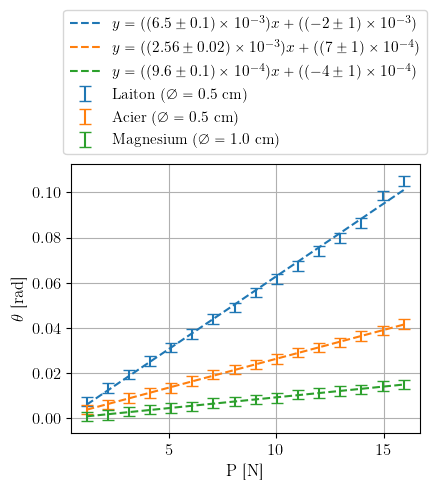

In [10]:
print(f'Laiton (longueur = {laiton["Longueur [cm]"][0]:.0f} cm)')
plot_data(laiton, label=f'Laiton ($\\diameter={epaisseur_tige_laiton.n:.1f}$ \\si{{\\centi\\meter}})')
coefs = plot_and_print_fit(laiton)
G = 16 * laiton["Longueur [cm]"][0] * 0.01 * taille_disque_laiton * 0.01 / (np.pi * (epaisseur_tige_laiton * 0.01) ** 4 * coefs[0])
print(f"=> {G = :.1ueP} ({G:.1ueL})")
print(abs(G * 1e-9 - 37.3) / 37.3 * 100)

print(f'Acier (longueur = {acier["Longueur [cm]"][0]:.0f} cm)')
plot_data(acier, label=f'Acier ($\\diameter={epaisseur_tige_acier.n:.1f}$ \\si{{\\centi\\meter}})')
coefs = plot_and_print_fit(acier)
G = 16 * acier["Longueur [cm]"][0] * 0.01 * taille_disque_acier * 0.01 / (np.pi * (epaisseur_tige_acier * 0.01) ** 4 * coefs[0])
print(f"=> {G = :.1ueP} ({G:.1ueL})")
print(abs(G * 1e-9 - 82.1) / 82.2 * 100)

print(f'Magnesium (longueur = {magnesium["Longueur [cm]"][0]:.0f} cm)')
plot_data(magnesium, label=f'Magnesium ($\\diameter={epaisseur_tige_magnesium.n:.1f}$ \\si{{\\centi\\meter}})')
coefs = plot_and_print_fit(magnesium)
G = 16 * magnesium["Longueur [cm]"][0] * 0.01 * taille_disque_magnesium * 0.01 / (np.pi * (epaisseur_tige_magnesium * 0.01) ** 4 * coefs[0])
print(f"=> {G = :.1ueP} ({G:.1ueL})")
print(abs(G * 1e-9 - 17.3) / 17.3 * 100)

plt.xlabel(r'P [\si{\newton}]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.6))
plt.grid()
plt.savefig('../figures/methode_statique_masse.pdf')